### P.S. This file is the same as 'test/method_testing.ipynb'

In [3]:
import sys

if "../" not in sys.path:
    sys.path.append("../")

from multirnn import MultiRNN

2024-06-05 08:21:50.435462: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-05 08:21:50.435507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-05 08:21:50.465055: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-05 08:21:50.516796: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
sys.path

['/home/emil/yes/envs/global_env/lib/python310.zip',
 '/home/emil/yes/envs/global_env/lib/python3.10',
 '/home/emil/yes/envs/global_env/lib/python3.10/lib-dynload',
 '',
 '/home/emil/yes/envs/global_env/lib/python3.10/site-packages',
 '../']

In [5]:
import pandas as pd
df = pd.read_csv("../data/energydata_complete.csv",
                 index_col="date", parse_dates=True)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
len(df) # perhaps test_size of 0.15

19735

In [7]:
test_size = 288 * 2 # 4 days
split_index = len(df) - test_size
split_index

19159

In [8]:
length = 288
train = df.iloc[:split_index]
test = df.iloc[split_index:]

In [9]:
# for testing purposes, only 2 models will be made,
# and parameters are set to low values,
# further information is found in "multirnn.py" at line 165

# create a MultiRNN object
multi = MultiRNN(train=train, test=test,
                 length=288, LSTM_units=32, # 32 for testing
                 activation="tanh", optimizer="adam",
                 batch_size=10, epochs=5, # 5 for testing
                 )

2024-06-05 08:21:54.234339: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-05 08:21:54.380080: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-05 08:21:54.380169: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-05 08:21:54.382821: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-05 08:21:54.382972: I external/local_xla/xla/stream_executor

Loss for 'Appliances_model' before training:


2024-06-05 08:21:55.863035: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902


1888/1888 [==============================] - 29s 15ms/step - loss: 0.0149
Loss for 'lights_model' before training:
1888/1888 [==============================] - 23s 12ms/step - loss: 0.0164


In [10]:
multi.save_datasets(dir_path="../col_data") # save datasets

In [11]:
multi.save_scalers(dir_path="../col_data") # save scalers for later use

In [12]:
multi.save_scaled_datasets(dir_path="../col_data") # scaled datasets are saved in the same directory as the datasets

In [13]:
multi.fit_models() # fit models

Training model: 'Appliances_model'
Epoch 1/5


2024-06-05 08:23:03.759678: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f8679006190 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-05 08:23:03.759718: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-06-05 08:23:03.785996: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1717568583.919034    2511 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1888/1888 [==============================] - 45s 23ms/step - loss: 0.0094 - val_loss: 0.0176
Epoch 2/5
1888/1888 [==============================] - 42s 22ms/step - loss: 0.0092 - val_loss: 0.0175
Epoch 3/5
1888/1888 [==============================] - 43s 23ms/step - loss: 0.0092 - val_loss: 0.0176
Epoch 4/5
1888/1888 [==============================] - 43s 23ms/step - loss: 0.0092 - val_loss: 0.0192
Epoch 5/5
1888/1888 [==============================] - 42s 22ms/step - loss: 0.0092 - val_loss: 0.0184
Training model: 'lights_model'
Epoch 1/5
1888/1888 [==============================] - 44s 23ms/step - loss: 0.0126 - val_loss: 0.0074
Epoch 2/5
1888/1888 [==============================] - 42s 22ms/step - loss: 0.0125 - val_loss: 0.0066
Epoch 3/5
1888/1888 [==============================] - 43s 23ms/step - loss: 0.0125 - val_loss: 0.0068
Epoch 4/5
1888/1888 [==============================] - 42s 22ms/step - loss: 0.0125 - val_loss: 0.0077
Epoch 5/5
1888/1888 [==============================]

In [14]:
multi.save_models(dir_path="../models") # save models

/home/emil/yes/envs/global_env/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
multi.predict() # predict on test data

1/1 [==============================] - 0s 33ms/step


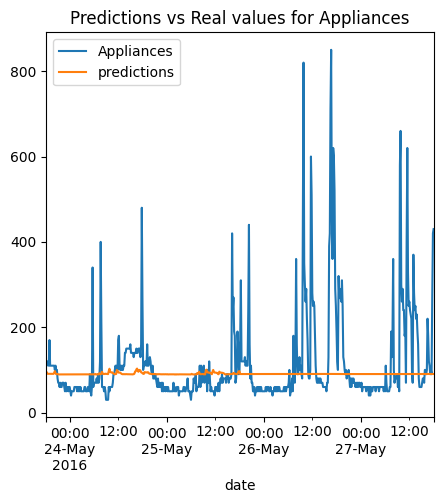

In [16]:
# plot predictions against test data --> if re-run should show a plot
multi.plot_predict_against_test_dataset_per_column(column="Appliances",
                                                   figure_height=5,
                                                   figure_width=5,
                                                   save_plot=True,
                                                   save_plot_name="../plots/Appliances.png")

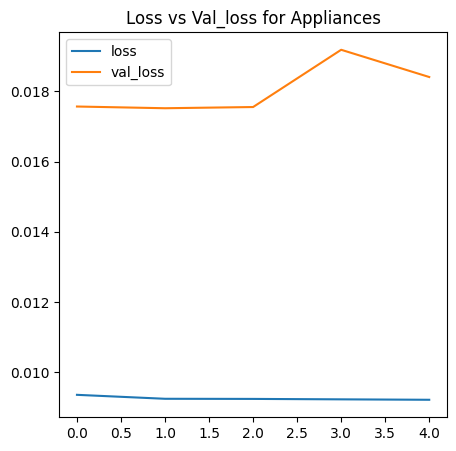

In [17]:
# plot loss and validation loss per column
multi.plot_loss_val_loss_per_column(column="Appliances",
                                    figure_width=5,
                                    figure_height=5,
                                    save_plot=True,
                                    save_plot_name="../plots/loss_val_loss_per_column.png")